# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | London Heathrow to Male In...
1,Not Verified | Very good flight following an ...
2,Not Verified | An hour's delay due to late ar...
3,✅ Trip Verified | I booked through BA becaus...
4,✅ Trip Verified | British airways lost bags ...


In [6]:
import os

# if data folder does not exist, create it
if not os.path.exists("data"):
    os.makedirs("data")

df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Data Parsing

In [5]:
# Extract the trip verified or not verified from the reviews
df["trip_verified"] = df["reviews"].str.split("|").str[0].str.strip()
df["reviews"] = df["reviews"].str.split("|").str[1].str.strip()

In [6]:
df.head()

,reviews,trip_verified
0,London Heathrow to Male In new business class....,✅ Trip Verified
1,Very good flight following an equally good fli...,Not Verified
2,An hour's delay due to late arrival of the inc...,Not Verified
3,I booked through BA because Loganair don’t hav...,✅ Trip Verified
4,British airways lost bags in LHR then found th...,✅ Trip Verified


In [7]:
df["trip_verified"].value_counts()

trip_verified
✅ Trip Verified    739
Not Verified       260
cNot Verified        1
Name: count, dtype: int64

In [8]:
# Clean up the trip_verified column
df["trip_verified"] = df["trip_verified"].str.replace("✅ Trip Verified", "Trip Verified")
df["trip_verified"] = df["trip_verified"].str.replace("cNot Verified", "Not Verified")

In [9]:
df["trip_verified"].value_counts()

trip_verified
Trip Verified    739
Not Verified     261
Name: count, dtype: int64

739 trips are verified, and 261 are not. The verified trips are more than the unverified trips. The verified trips are 74% of the total trips, and the unverified trips are 26% of the total trips.

## Basic Text Cleaning

In [10]:
# Clean the reviews column
# Convert to lowercase
# Remove special characters, punctuation
# Remove the unnecessary spaces

df["cleaned_reviews"] = df["reviews"].str.lower()
df["cleaned_reviews"] = df["cleaned_reviews"].str.replace("[^A-Za-z]+", "")

In [11]:
df.head()

,reviews,trip_verified,cleaned_reviews
0,London Heathrow to Male In new business class....,Trip Verified,london heathrow to male in new business class....
1,Very good flight following an equally good fli...,Not Verified,very good flight following an equally good fli...
2,An hour's delay due to late arrival of the inc...,Not Verified,an hour's delay due to late arrival of the inc...
3,I booked through BA because Loganair don’t hav...,Trip Verified,i booked through ba because loganair don’t hav...
4,British airways lost bags in LHR then found th...,Trip Verified,british airways lost bags in lhr then found th...


## Tokenization and Stopwords Removal

In [16]:
# Tokenization
# Removing stop words

import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [18]:
nltk.download('omw-1.4')
nltk.download("averaged_perceptron_tagger")

post_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}

def token_stop_post(text):
    tags = pos_tag(word_tokenize(text))
    return [word for word, tag in tags if word.lower() not in stopwords.words("english") and wordnet.synsets(word) and post_dict.get(tag[0])]

df["tokenized_reviews"] = df["cleaned_reviews"].apply(token_stop_post)
df.head()

[nltk_data] Downloading package omw-1.4 to C:\Users\Eda
[nltk_data]     AYDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Eda AYDIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,trip_verified,cleaned_reviews,tokenized_reviews
0,London Heathrow to Male In new business class....,Trip Verified,london heathrow to male in new business class....,"[london, male, new, business, class, ba, conti..."
1,Very good flight following an equally good fli...,Not Verified,very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh..."
2,An hour's delay due to late arrival of the inc...,Not Verified,an hour's delay due to late arrival of the inc...,"[hour, delay, due, late, arrival, incoming, ai..."
3,I booked through BA because Loganair don’t hav...,Trip Verified,i booked through ba because loganair don’t hav...,"[booked, ba, representatives, manchester, airp..."
4,British airways lost bags in LHR then found th...,Trip Verified,british airways lost bags in lhr then found th...,"[british, airways, lost, bags, found, sent, co..."


## Lemmatization and Stemming

In [19]:
# Lemmatization - simplifying words to their root form

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    return [lemmatizer.lemmatize(word, post_dict.get(tag[0], wordnet.NOUN)) for word, tag in pos_tag(pos_data)]

df["lemmatized_reviews"] = df["tokenized_reviews"].apply(lemmatize)

In [20]:
df.head()

,reviews,trip_verified,cleaned_reviews,tokenized_reviews,lemmatized_reviews
0,London Heathrow to Male In new business class....,Trip Verified,london heathrow to male in new business class....,"[london, male, new, business, class, ba, conti...","[london, male, new, business, class, ba, conti..."
1,Very good flight following an equally good fli...,Not Verified,very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh...","[good, flight, follow, equally, good, flight, ..."
2,An hour's delay due to late arrival of the inc...,Not Verified,an hour's delay due to late arrival of the inc...,"[hour, delay, due, late, arrival, incoming, ai...","[hour, delay, due, late, arrival, incoming, ai..."
3,I booked through BA because Loganair don’t hav...,Trip Verified,i booked through ba because loganair don’t hav...,"[booked, ba, representatives, manchester, airp...","[book, ba, representative, manchester, airport..."
4,British airways lost bags in LHR then found th...,Trip Verified,british airways lost bags in lhr then found th...,"[british, airways, lost, bags, found, sent, co...","[british, airway, lose, bag, find, send, colog..."


## Good reviews or Bad reviews

In [22]:
%pip install vaderSentiment -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def sentiment_score(review):
    return analyzer.polarity_scores(review)["compound"]

df["sentiment_score"] = df["reviews"].apply(sentiment_score)

def vader_sentiment(score):
    return "Positive" if score > 0 else "Negative" if score < 0 else "Neutral"

df["sentiment_analysis"] = df["sentiment_score"].apply(vader_sentiment)

In [24]:
df.head()

,reviews,trip_verified,cleaned_reviews,tokenized_reviews,lemmatized_reviews,sentiment_score,sentiment_analysis
0,London Heathrow to Male In new business class....,Trip Verified,london heathrow to male in new business class....,"[london, male, new, business, class, ba, conti...","[london, male, new, business, class, ba, conti...",0.9865,Positive
1,Very good flight following an equally good fli...,Not Verified,very good flight following an equally good fli...,"[good, flight, following, equally, good, fligh...","[good, flight, follow, equally, good, flight, ...",0.8399,Positive
2,An hour's delay due to late arrival of the inc...,Not Verified,an hour's delay due to late arrival of the inc...,"[hour, delay, due, late, arrival, incoming, ai...","[hour, delay, due, late, arrival, incoming, ai...",0.8442,Positive
3,I booked through BA because Loganair don’t hav...,Trip Verified,i booked through ba because loganair don’t hav...,"[booked, ba, representatives, manchester, airp...","[book, ba, representative, manchester, airport...",0.4368,Positive
4,British airways lost bags in LHR then found th...,Trip Verified,british airways lost bags in lhr then found th...,"[british, airways, lost, bags, found, sent, co...","[british, airway, lose, bag, find, send, colog...",-0.7391,Negative


In [25]:
df["sentiment_analysis"].value_counts()

sentiment_analysis
Negative    533
Positive    461
Neutral       6
Name: count, dtype: int64

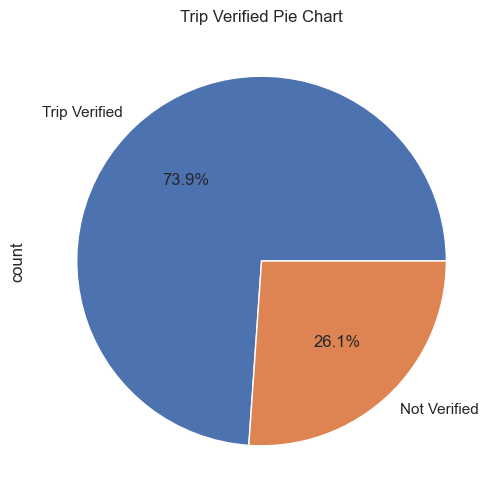

In [43]:
import matplotlib.pyplot as plt

# pie chart - trip verified
plt.figure(figsize=(10, 6))
df["trip_verified"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Trip Verified Pie Chart")
plt.show()


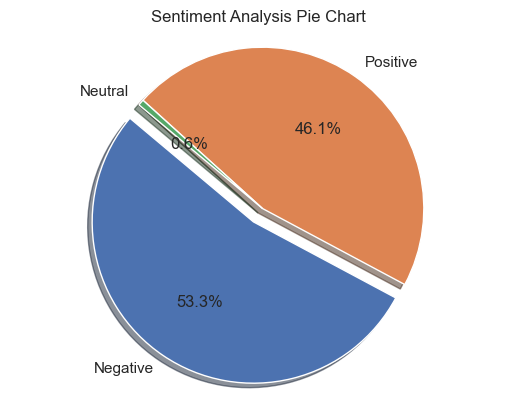

In [44]:
import matplotlib.pyplot as plt

# pie chart
labels = df["sentiment_analysis"].value_counts().index
sizes = df["sentiment_analysis"].value_counts().values
explode = (0.1, 0, 0)  # explode 1st slice

plt.title("Sentiment Analysis Pie Chart")
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


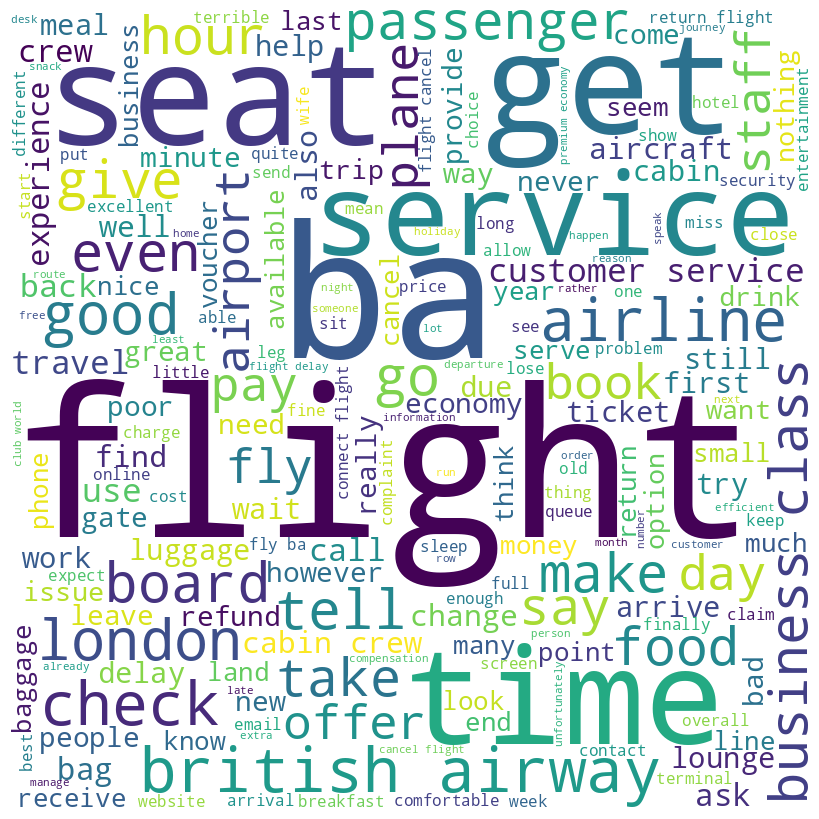

In [49]:
from wordcloud import WordCloud

# Create a word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(" ".join(df["lemmatized_reviews"].sum()))

plt.figure(figsize = (8, 8), facecolor = None)  
plt.imshow(wordcloud)
plt.title("Word Cloud for British Airways Reviews")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [50]:
df.to_csv("data/BA_reviews_cleaned.csv")